In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_pickle('AlgerianExport.pkl')

In [4]:
df.head()

,0
1960-12-31,39.043173
1961-12-31,46.244557
1962-12-31,19.793873
1963-12-31,24.684682
1964-12-31,25.084059


In [5]:
def ses(alpha, values):
    res = [values[0]]
    curr = values[0]
    prev = values[0]
    
    for val in values[1:]:
        curr = alpha * prev + (1-alpha) * curr
        res.append(curr)
        prev = val
        
    return res

results = []
alphas = [x/100 for x in range(1,100)]

for alpha in alphas:
    results.append((alpha, mean_squared_error(df[0].values, ses(alpha, df[0].values))))
    
best = min(results, key=lambda x: x[1])
print(best)

(0.84, 34.40580622418802)


In [6]:
fit=SimpleExpSmoothing(df,initialization_method="estimated").fit()

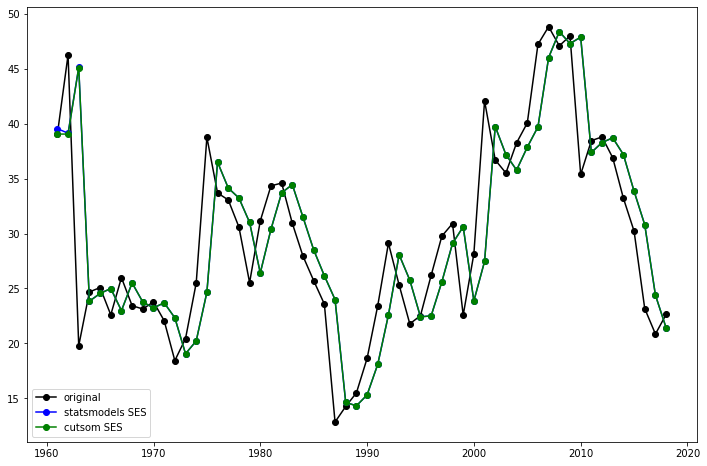

In [7]:
plt.figure(figsize=(12,8))
plt.plot(df,marker="o", color="black")
plt.plot(fit.fittedvalues, marker="o", color="blue")
plt.plot(df.index, ses(best[0], df[0].values), marker="o", color="green")
plt.legend(["original", "statsmodels SES", "cutsom SES"])

